In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import keila_wrangle as w

# Wrangle

In [2]:
# get dataset
df = w.read_wine()

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine,wine_type,quality_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,red,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,red,low


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [5]:
# cleaning data
train, validate, test = w.clean_wine()

In [6]:
# found no nulls 
df[df.isnull()].sum()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
red_wine                0.0
wine_type                 0
quality_type              0
dtype: object

SUMMARY REPORT
          
          
Dataframe head: 
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  red_wine wine_type quality_type  
0      9.4        5         1       red          low  
1      9.8        5         1       red          low  
2      9.8        5         1       red          low  
          
          
          
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 

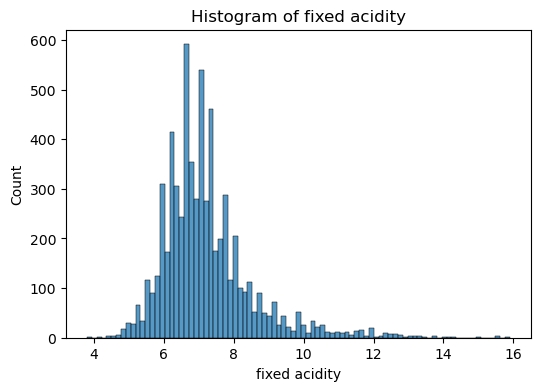

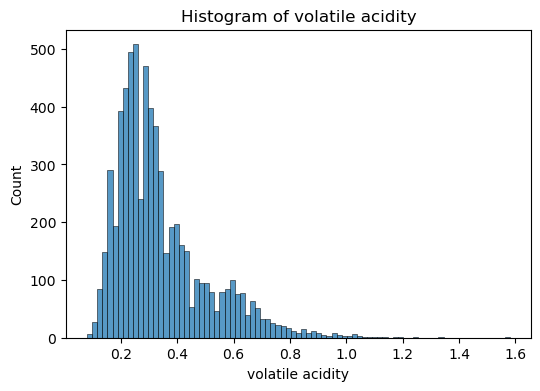

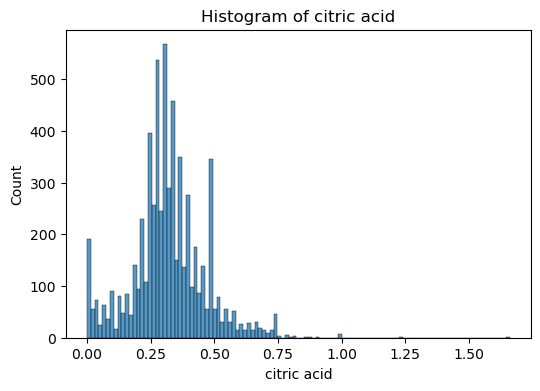

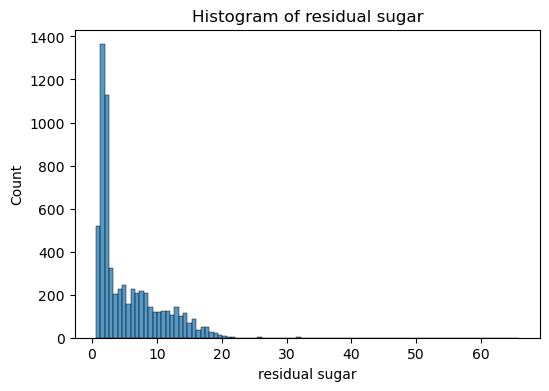

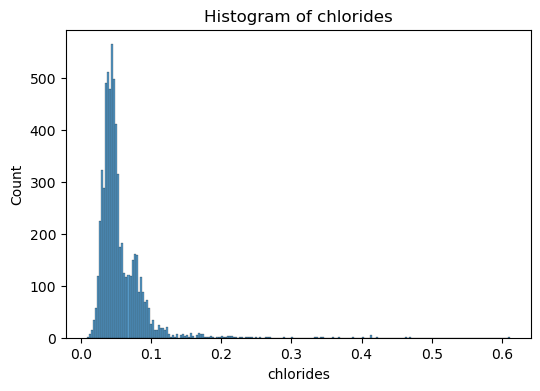

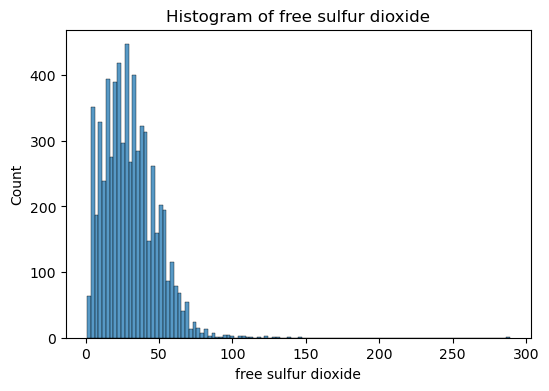

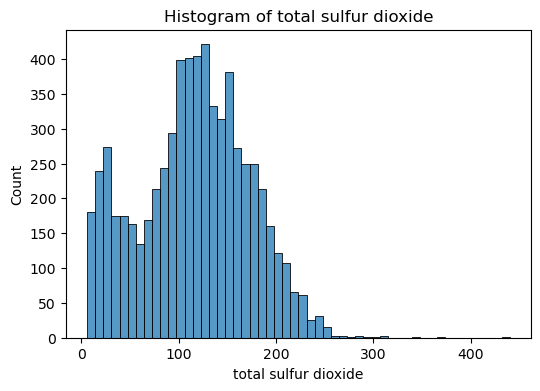

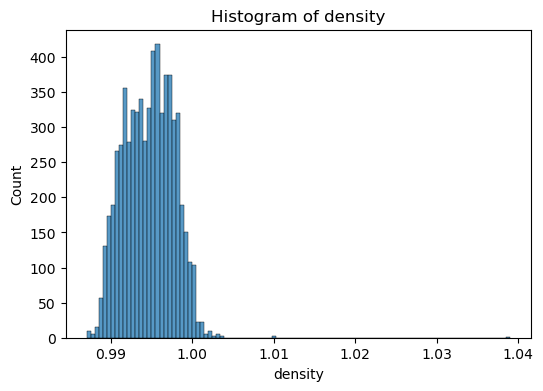

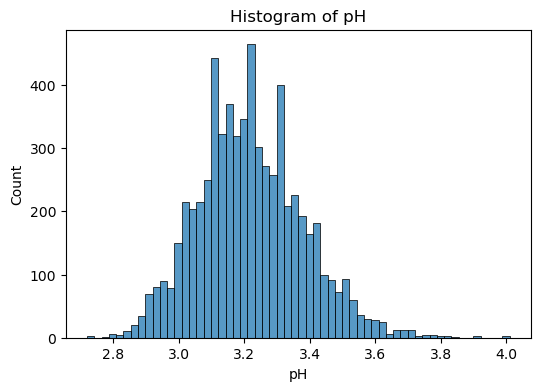

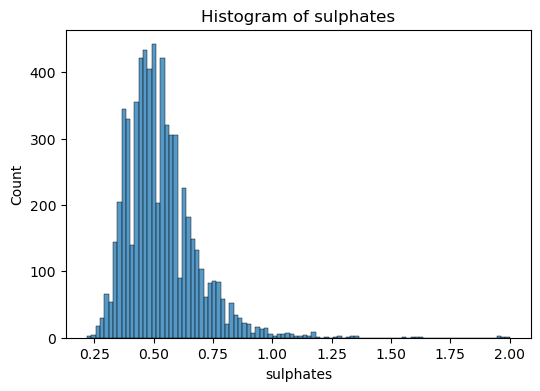

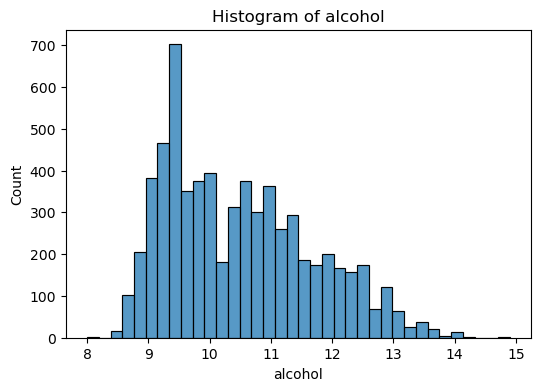

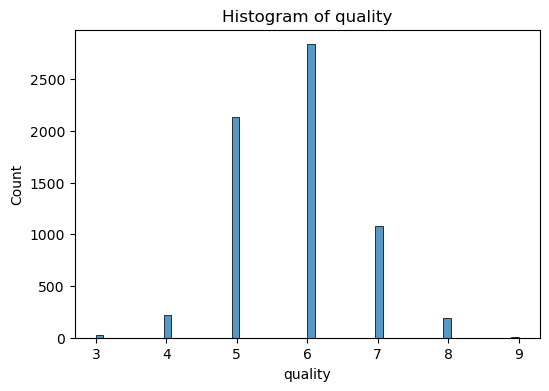

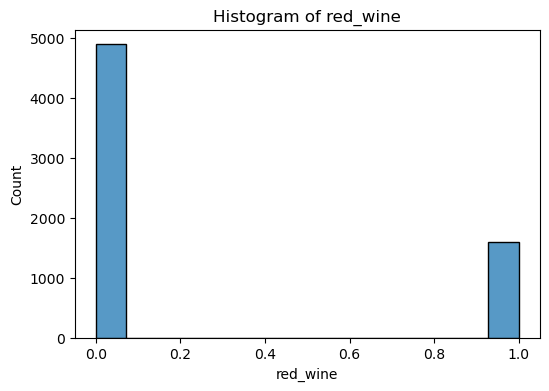

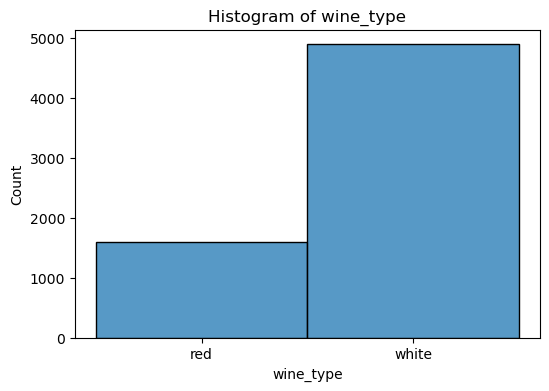

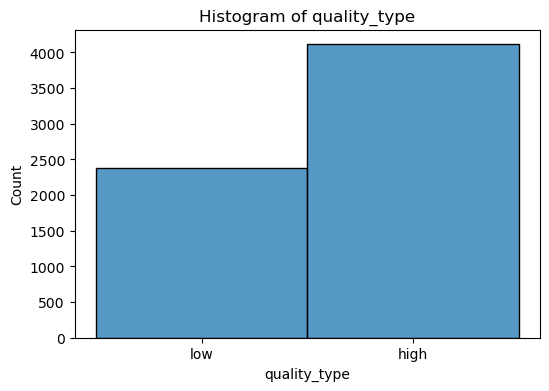

In [7]:
w.summarize(df)

In [9]:
# splitting into x and y
target = "quality"
train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = w.split_data_xy(train, validate, test, target)

NameError: name 'w' is not defined

In [9]:
# scaling data
x_train_scaled, x_validate_scaled, x_test_scaled = w.mm_scale(x_train, x_validate, x_test)

KeyError: "['high_citric'] not in index"

In [6]:
x_train_scaled

NameError: name 'x_train_scaled' is not defined

* sulphates, density, total sulfur dioxide, free sulfur dioxide, chlorides, residual sugar, citric acid, volatile acidity   has outliers

In [7]:
train, validate, test = w.clean_wine()

NameError: name 'w' is not defined

In [10]:
target = "quality_type"
train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test = w.split_data_xy(train, validate, test, target)

NameError: name 'w' is not defined

In [ ]:
x_train_scaled, x_validate_scaled, x_test_scaled = w.mm_scale(x_train, x_validate, x_test)


In [ ]:
x_train_scaled

# Exploration

In [11]:
target_var = 'quality'
feat_vars = ['fixed_acidity', 'volatile_acidity', 'citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide',
            'density','ph','alcohol','red_wine']
def plot_correlations(df, target_var, feat_vars):
    # Calculate correlations between feature variables and target variable
    correlations = df[feat_vars].corrwith(df[target_var]).sort_values()
   # Create a bar chart to visualize correlations
    plt.figure(figsize=(10,6))
    plt.barh(correlations.index, correlations.values)
    plt.xlabel('Target Variable')
    plt.title('Feature Variable Correlations with Target Variable')
    plt.show()

In [12]:
plot_correlations(train,target_var,feat_vars)

NameError: name 'train' is not defined

In [3]:
def plot_continuous_target(y):
    "Function to plot target variable"
   
    # Plot the continuous target variable
    plt.figure(figsize=(8, 6))
    plt.hist(y, bins=5,histtype='bar')
    plt.xlabel('Target Variable')
    plt.ylabel('Frequency')
    plt.title('Distribution of Continuous Target Variable')
    plt.show()

In [ ]:
plot_continuous_target(train.quality)

In [ ]:
cat_var = 'quality_type'
cont_var = ['fixed_acidity', 'volatile_acidity', 'citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide',
            'density','ph','alcohol']
hue='red_wine'
def plot_categorical_and_continuous_vars(df, cat_var, cont_var,hue):
    for var in cont_var:
        # Create a box plot
        plt.figure(figsize=(12, 6))
        sns.barplot(x=cat_var, y=var, data=df, hue=hue)
        plt.axhline(y=df[var].mean(), color='r', linestyle='--')
        plt.xlabel(cat_var)
        plt.ylabel(var)
        plt.title(f'{cat_var} vs. {var}')
        plt.show()

In [ ]:
plot_categorical_and_continuous_vars(train, cat_var, cont_var,hue)

In [ ]:
train_white_wine=train[train.red_wine==0]

In [ ]:
train_red_wine=train[train.red_wine==1]

In [ ]:
from sklearn.linear_model import LinearRegression, LassoLarsCV
import scipy.stats as stats
def statistical_tests_cont_cat(variable_continuous, variable_categorical, alpha=0.05):
    # Perform t-test or Mann-Whitney U test based on the number of categories in the categorical variable
    unique_categories = variable_categorical.unique()
    num_categories = len(unique_categories)

    if num_categories == 2:
        category1 = variable_continuous[variable_categorical == unique_categories[0]]
        category2 = variable_continuous[variable_categorical == unique_categories[1]]

        t_statistic, p_value = stats.ttest_ind(category1, category2)
        test_type = "T-Test"
    else:
        categories = [variable_continuous[variable_categorical == category] for category in unique_categories]
        statistic, p_value = stats.kruskal(*categories)
        t_statistic = statistic
        test_type = "Kruskal-Wallis Test"

    print(f"{test_type} Results:")
    print(f"Test Statistic: {t_statistic}")
    print(f"P-Value: {p_value}")

    if p_value < alpha:
        print("We reject the null hypothesis.")
    else:
        print("We fail to reject the null hypothesis.")

    # Perform ANOVA or Kruskal-Wallis test based on the number of categories in the categorical variable
    if num_categories > 2:
        if num_categories <= 10:  # Perform ANOVA test
            groups = [variable_continuous[variable_categorical == category] for category in unique_categories]
            f_statistic, p_value = stats.f_oneway(*groups)
            test_type = "ANOVA"
        else:  # Perform Kruskal-Wallis test
            groups = [variable_continuous[variable_categorical == category] for category in unique_categories]
            statistic, p_value = stats.kruskal(*groups)
            f_statistic = statistic
            test_type = "Kruskal-Wallis Test"

        print(f"\n{test_type} Results:")
        print(f"Test Statistic: {f_statistic}")
        print(f"P-Value: {p_value}")

        if p_value < alpha:
            print("We reject the null hypothesis.")
        else:
            print("We fail to reject the null hypothesis.")

In [ ]:
def chi_square_test(variable1, variable2, alpha=0.05):
    "This function calculates the chi-square test for two categorical variables and prints out the results."
    observed = pd.crosstab(variable1, variable2)
    chi2, p, dof, expected = stats.chi2_contingency(observed)
    
    print("Observed Contingency Table:")
    print(observed)
    print("Expected Contingency Table:")
    print(expected)
    print("Chi-Square Test Statistic:")
    print(chi2)
    print("p-value:")
    print(p)
    
    if p < alpha:
        print('We reject the null hypothesis.')
    else:
        print('We fail to reject the null hypothesis.')


# Hypotheses:

## 1. Does alcohol affects the quality of the Wine?

H_$0$ : Alcohol has no correlation with the quality of the wine.
  
H_$A$: Alcohol has a correlation with the quality of the wine.

In [ ]:
cat_var = 'quality_type'
cont_var = ['alcohol']
hue='red_wine'
plot_categorical_and_continuous_vars(train,cat_var,cont_var,hue)

In [ ]:
statistical_tests_cont_cat(train.alcohol,train.quality_type)

## 2. Does ph affects the quality of the wine?

H_$0$ : Ph has no correlation with the quality of the wine.
  
H_$A$: Ph has a correlation with the quality of the wine.


In [ ]:
cat_var = 'quality_type'
cont_var = ['ph']
hue='red_wine'
plot_categorical_and_continuous_vars(train,cat_var,cont_var,hue)

In [ ]:
statistical_tests_cont_cat(train.ph,train.quality_type)

In [ ]:
statistical_tests_cont_cat(train.ph,train.quality)

## 3. Does chloride content affects the quality of the wine?

H_$0$ : Chloride has no correlation with the quality of the wine.
  
H_$A$: Chloride has a correlation with the quality of the wine.

In [ ]:
cat_var = 'quality_type'
cont_var = ['chlorides']
hue='wine_type'
plot_categorical_and_continuous_vars(train,cat_var,cont_var,hue)

In [ ]:
statistical_tests_cont_cat(train.chlorides,train.quality_type)

# Clustering

- Features to be use: alcohol, chlorides, residual sugar and density.

In [ ]:
X=x_train_scaled[['alcohol','red_wine','residual_sugar']]


In [ ]:
y_train.value_counts()

In [ ]:
from sklearn.cluster import KMeans

def elbow_method(data, max_k):
    wcss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    
    # Plot the WCSS values
    plt.plot(range(1, max_k+1), wcss)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    plt.show()


In [ ]:
elbow_method(X,4)

In [ ]:
def calculate_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    
    # Create a new DataFrame with the cluster labels
    df = pd.DataFrame(data)
    df['cluster'] = kmeans.labels_
    
    return df

In [ ]:
clusters=calculate_kmeans(X,3)
clusters

In [ ]:
sns.relplot(data=clusters,
           x='residual_sugar',
           y='alcohol',
           hue='red_wine',
           col='cluster',
           col_wrap=2)
plt.show()

In [ ]:
X.cluster.value_counts().plot.barh();

In [ ]:
X=x_train_scaled[['alcohol','chlorides','residual_sugar']]

In [ ]:
elbow_method(X,3)

In [ ]:
clusters=calculate_kmeans(X,3)
clusters

In [ ]:
sns.relplot(data=clusters,
           x='residual_sugar',
           y='alcohol',
           col='cluster',
           col_wrap=2)
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def visualize_clusters(data, x, y, cluster_labels, hue):
    "This function creates a scatter plot to visualize different clusters using Plotly."
    
    # Create subplots with one subplot per cluster
    fig = make_subplots(rows=2, cols=2, subplot_titles=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
    
    # Iterate over each unique cluster label
    for cluster in cluster_labels.unique():
        # Filter data for the current cluster
        cluster_data = data[cluster_labels == cluster]
        
        # Add scatter trace for the current cluster
        fig.add_trace(
            go.Scatter(
                x=cluster_data[x],
                y=cluster_data[y],
                mode='markers',
                marker=dict(color=cluster_data[hue], colorscale='Viridis'),
                showlegend=True,
                name='Cluster ' + str(cluster)
            ),
            row=(cluster // 2) + 1,
            col=(cluster % 2) + 1
        )
    
    # Update layout
    fig.update_layout(height=600, width=800, title='Cluster Visualization')
    fig.update_xaxes(title_text=x, row=2, col=1)
    fig.update_yaxes(title_text=y, row=1, col=1)
    
    # Show the plot
    fig.show()





In [ ]:
visualize_clusters(clusters,'alcohol','residual_sugar',clusters.cluster,'chlorides')

In [ ]:
sns.relplot(data=clusters,
           x='residual_sugar',
           y='alcohol',
           hue='chlorides',
           col='cluster',
           col_wrap=2)
plt.show()

## Clusterting adding the target variable 

In [ ]:
train.head()

In [ ]:
x_train= train[['quality','residual_sugar','alcohol']]

In [ ]:
def minmax_scale_data(X_train):
    # Initialize MinMaxScaler object
    scaler = MinMaxScaler()
    
    # Fit scaler object to training data
    scaler.fit(X_train)
    
    # Transform training data
    X_train_scaled = scaler.transform(X_train)
    
    # Convert scaled data to DataFrame
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    
    # Return scaled data as a DataFrame
    return X_train_scaled_df

In [ ]:
x_train_s=minmax_scale_data(x_train)
x_train_s

In [ ]:
t_clusters=calculate_kmeans(x_train_s,4)
t_clusters

In [ ]:
visualize_clusters(t_clusters,'alcohol','residual_sugar',t_clusters.cluster,'quality')

In [ ]:
sns.relplot(data=t_clusters,
           x='residual_sugar',
           y='alcohol',
           hue='quality',
           col='cluster',
           col_wrap=2)
plt.show()

## Clustering with just red wine information

In [ ]:
train_red_wine.head(2)

In [ ]:
x_red_train= train_red_wine[['quality','residual_sugar','alcohol']]

In [ ]:
x_red_train_s=minmax_scale_data(x_red_train)

In [ ]:
red_cluster=calculate_kmeans(x_red_train_s,2)
red_cluster.head(2)

In [ ]:
visualize_clusters(red_cluster,'alcohol','residual_sugar',red_cluster.cluster)

In [ ]:
sns.relplot(data=red_cluster,
           x='residual_sugar',
           y='alcohol',
           hue='quality',
           col='cluster',
           col_wrap=2)
plt.show()

## DBSCAN Clustering 

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN

def dbscan_clustering(data, epsilon, min_samples):
    "This function performs DBSCAN clustering and adds the cluster labels as a new column in the DataFrame."
    
    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(data)
    
    # Add cluster labels as a new column
    data['cluster'] = cluster_labels
    
    return data


In [ ]:
db_clusters=dbscan_clustering(X,10,10)

In [ ]:
db_clusters

In [ ]:
visualize_clusters(db_clusters,'alcohol','residual_sugar',db_clusters.cluster)

## Clustering with target variable and total sulfur dioxide

In [ ]:
x_train_scaled

In [ ]:
x_train= train[['quality','residual_sugar','alcohol']]

In [ ]:
x_scaled_s=minmax_scale_data(x_train)

In [ ]:
elbow_method(x_scaled_s,8)

In [ ]:
s_clusters=calculate_kmeans(x_scaled_s,3)

In [ ]:
sns.relplot(data=s_clusters,
           x='total_sulfur_dioxide',
           y='alcohol',
           hue='quality',
           col='cluster',
           col_wrap=2)
plt.show()

## Clustering with total sulfur dioxide, chloride and target variable

In [ ]:
x_train= train[['quality','total_sulfur_dioxide','chlorides']]

In [ ]:
x_scaled_c=minmax_scale_data(x_train)

In [ ]:
c_cluster=calculate_kmeans(x_scaled_c,3)

In [ ]:
elbow_method(x_scaled_c,8)

In [ ]:
sns.relplot(data=c_cluster,
           x='total_sulfur_dioxide',
           y='chlorides',
           hue='quality',
           col='cluster',
           col_wrap=2)
plt.show()

## Creating a clustering utilizing residual sugar, alcohol and total sulfur dioxide as a new "feaure" column. and comparing it against chlorides

In [ ]:
train.head()

In [ ]:
X_train=train[['chlorides','density','quality']]

In [ ]:
X_Train_Scaled=minmax_scale_data(X_train)

In [ ]:
X_Train_Scaled['cluster'] = s_clusters.cluster.map({
    0:'high',
    1:'medium',
    2:'low'
})

In [ ]:
X_Train_Scaled

In [ ]:
sns.relplot(data=X_Train_Scaled,
           x='density',
           y='chlorides',
            hue='quality',
           col='cluster',
           col_wrap=2)
plt.show()

# MODELING:

In [ ]:
red_wine_mean_citric_acid = train[train.red_wine == 1].citric_acid.mean()
train['high_citric'] = (train.red_wine == 1) & (train.citric_acid > red_wine_mean_citric_acid)
train['high_citric'] = train['high_citric'].astype(int)


red_wine_mean_citric_acid = validate[validate.red_wine == 1].citric_acid.mean()
validate['high_citric'] = (validate.red_wine == 1) & (validate.citric_acid > red_wine_mean_citric_acid)
validate['high_citric'] = validate['high_citric'].astype(int)


red_wine_mean_citric_acid = test[test.red_wine == 1].citric_acid.mean()
test['high_citric'] = (test.red_wine == 1) & (test.citric_acid > red_wine_mean_citric_acid)
test['high_citric'] = test['high_citric'].astype(int)


In [ ]:
x_train=train[['alcohol','residual_sugar','total_sulfur_dioxide','chlorides','high_citric']]
y_train=train.quality_type
x_validate=validate[['alcohol','residual_sugar','total_sulfur_dioxide','chlorides','high_citric']]
y_validate=validate.quality_type
x_test=test[['alcohol','residual_sugar','total_sulfur_dioxide','chlorides','high_citric']]
y_test=test.quality_type

In [ ]:
x_train.head()

In [ ]:
def minmax_scale_data(X_train, X_validate, X_test):
    # Initialize MinMaxScaler object
    scaler = MinMaxScaler()

    # Fit scaler object to training data
    scaler.fit(X_train)

    # Transform training and validation data
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), columns=X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    # Return scaled data as DataFrames
    return X_train_scaled, X_validate_scaled, X_test_scaled

In [ ]:
x_train_scaled,x_validate_scaled,x_test_scaled=minmax_scale_data(x_train,x_validate,x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
y_train.value_counts()

In [ ]:
def create_pie_chart(df, column_name,title):
    values = df[column_name].value_counts()
    labels = values.index.tolist()
    sizes = values.tolist()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(title)
    plt.show()

In [ ]:
create_pie_chart(train,'quality_type','Quality Type Visualization')

In [ ]:
# DECISION TREE
import pandas as pd

def fit_DT_random_features(X_scaled, y, n_random_features=0):
    """
    Fits a decision tree model to the input pre-scaled data `X_scaled` and `y`,
    with an additional `n_random_features` randomly selected features from `X_scaled`.
    Returns the best model that achieves a score of 70% or higher on the `y` variable,
    along with the results of the top five best models.
    """
    results = []
    best_models = []
    for depth in range(1, 21):
        selected_cols = np.random.choice(X_scaled.columns, size=n_random_features, replace=False)
        X_with_random = X_scaled.copy()
        for col in selected_cols:
            X_with_random[col] = np.random.permutation(X_with_random[col].values)
        model = DecisionTreeClassifier(max_depth=depth)
        model.fit(X_with_random, y)
        score = model.score(X_with_random, y)
        if 0.68 < score < 0.80:
            results.append((model, score))
    
    results.sort(key=lambda x: x[1], reverse=True)
    best_models = [result[0] for result in results[:5]]
    best_scores = [result[1] for result in results[:5]]
    top_models_df = pd.DataFrame({'Model': best_models, 'Score': best_scores})
    
    return best_models[0], top_models_df



In [ ]:
fit_DT_random_features(X,y_train,4)

In [ ]:


def fit_KNN_random_features(X_scaled, y, n_random_features=0):
    """
    Fits a K-Nearest Neighbors model to the input pre-scaled data `X_scaled` and `y`,
    with an additional `n_random_features` randomly selected features from `X_scaled`.
    Returns the best model that achieves a score of 70% or higher on the `y` variable,
    along with the results of the top five best models.
    """
    results = []
    best_models = []
    for n_neighbors in range(1, 21):
        selected_cols = np.random.choice(X_scaled.columns, size=n_random_features, replace=False)
        X_with_random = X_scaled.copy()
        for col in selected_cols:
            X_with_random[col] = np.random.permutation(X_with_random[col].values)
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        model.fit(X_with_random, y)
        score = model.score(X_with_random, y)
        if 0.68 < score < 0.80:
            results.append((model, score))
    
    results.sort(key=lambda x: x[1], reverse=True)
    best_models = [result[0] for result in results[:5]]
    best_scores = [result[1] for result in results[:5]]
    top_models_df = pd.DataFrame({'Model': best_models, 'Score': best_scores})
    
    return best_models[0], top_models_df


def fit_RF_random_features(X_scaled, y, n_random_features=0):
    """
    Fits a Random Forest model to the input pre-scaled data `X_scaled` and `y`,
    with an additional `n_random_features` randomly selected features from `X_scaled`.
    Returns the best model that achieves a score between 0.68 and 0.95 on the `y` variable,
    along with the results of the top five best models.
    """
    results = []
    best_models = []
    for n_estimators in range(10, 201, 10):
        selected_cols = np.random.choice(X_scaled.columns, size=n_random_features, replace=False)
        X_with_random = X_scaled.copy()
        for col in selected_cols:
            X_with_random[col] = np.random.permutation(X_with_random[col].values)
        model = RandomForestClassifier(n_estimators=n_estimators)
        model.fit(X_with_random, y)
        score = model.score(X_with_random, y)
        if 0.68 < score < 0.99:
            results.append((model, score))

    results.sort(key=lambda x: x[1], reverse=True)
    if results:
        best_models = [result[0] for result in results[:5]]
        best_scores = [result[1] for result in results[:5]]
        top_models_df = pd.DataFrame({'Model': best_models, 'Score': best_scores})
        return best_models[0], top_models_df
    else:
        return None, None




In [ ]:
fit_KNN_random_features(X,y_train,3)

In [ ]:
fit_KNN_random_features(X,y_train,4)

In [ ]:
fit_RF_random_features(X,y_train,3)

In [ ]:
fit_RF_random_features(X,y_train,2)

In [ ]:
def fit_LR_random_features(X_scaled, y, n_random_features=0):
    """
    Fits a Logistic Regression model to the input pre-scaled data `X_scaled` and `y`,
    with an additional `n_random_features` randomly selected features from `X_scaled`.
    Returns the best model that achieves a score between 0.68 and 0.80 on the `y` variable,
    along with the results of the top five best models.
    """
    results = []
    best_models = []
    for C in [0.001, 0.01, 0.1, 1.0, 10.0]:
        selected_cols = np.random.choice(X_scaled.columns, size=n_random_features, replace=False)
        X_with_random = X_scaled.copy()
        for col in selected_cols:
            X_with_random[col] = np.random.permutation(X_with_random[col].values)
        model = LogisticRegression(C=C)
        model.fit(X_with_random, y)
        score = model.score(X_with_random, y)
        if 0.68 < score < 0.80:
            results.append((model, score))
    
    results.sort(key=lambda x: x[1], reverse=True)
    best_models = [result[0] for result in results[:5]]
    best_scores = [result[1] for result in results[:5]]
    top_models_df = pd.DataFrame({'Model': best_models, 'Score': best_scores})
    
    return best_models[0], top_models_df




In [ ]:
fit_LR_random_features(X,y_train,3)

# Testing on Validate and Test:

- Decision Tree Classifier: 13 and 15 max_depth
- KN Neighbors: 2 and 3 neighbors

In [ ]:
from sklearn.metrics import accuracy_score
def run_decision_tree(X_train, X_test, y_train, y_test, max_depth):
    # Create a Decision Tree classifier
    dt = DecisionTreeClassifier(max_depth=max_depth)
    
    # Train the classifier on the training data
    dt.fit(X_train, y_train)
    
    # Predict the target variable for the test data
    y_pred = dt.predict(X_test)
    
    # Calculate and return the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

### Decision Tree max depth 16
- Results with train data : .7981

In [ ]:
run_decision_tree(x_train, x_validate, y_train, y_validate, 16)

In [ ]:
run_decision_tree(x_train, x_test, y_train, y_test, 16)

### Decision Tree max depth 13
- Results with train data: .7930

In [ ]:
run_decision_tree(x_train, x_validate, y_train, y_validate, 13)

In [ ]:
run_decision_tree(x_train, x_test, y_train, y_test, 13)

### KNN 3 n_neighbors
- Results with train data: .7761

In [ ]:
def run_knn(X_train, X_test, y_train, y_test, n_neighbors):
    # Create a K-Nearest Neighbors classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the classifier on the training data
    knn.fit(X_train, y_train)
    
    # Predict the target variable for the test data
    y_pred = knn.predict(X_test)
    
    # Calculate and return the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [ ]:
run_knn(x_train,x_validate,y_train,y_validate,3)

In [ ]:
run_knn(x_train,x_test,y_train,y_test,3)

### KNN 2 n_neighbors
- Results with train data: .7702

In [ ]:
run_knn(x_train,x_validate,y_train,y_validate,2)

In [ ]:
run_knn(x_train,x_test,y_train,y_test,3)

# Modeling using x_train adding the high citric column

In [ ]:
fit_DT_random_features(x_train_scaled,y_train)

In [ ]:
fit_KNN_random_features(x_train_scaled,y_train)

## Running best models on new dataframe including high citric acid

### Decision Tree Max Depth 7
- Results with train data: .7885

In [ ]:
run_decision_tree(x_train_scaled,x_validate_scaled,y_train,y_validate,7)

In [ ]:
run_decision_tree(x_train_scaled,x_test_scaled,y_train,y_test,7)

### Decision Tree Max Depth 6
- Results with train data: .7719

In [ ]:
run_decision_tree(x_train_scaled,x_validate_scaled,y_train,y_validate,6)

In [ ]:
run_decision_tree(x_train_scaled,x_test_scaled,y_train,y_test,6)

### KNN n_neighbors 6
- Results with train data: .7939

In [ ]:
run_knn(x_train_scaled,x_validate_scaled,y_train,y_validate,6)

In [ ]:
run_knn(x_train_scaled,x_test_scaled,y_train,y_test,6)

### KNN n_neighbors 7
- Results with train data: .7930

In [ ]:
run_knn(x_train_scaled,x_validate_scaled,y_train,y_validate,7)

In [ ]:
run_knn(x_train_scaled,x_test_scaled,y_train,y_test,7)

## Modeling adding the volatile acidity column

In [ ]:
train.head()

In [ ]:
x_train=train[['alcohol','residual_sugar','total_sulfur_dioxide','chlorides','high_citric','volatile_acidity']]
y_train=train.quality_type
x_validate=validate[['alcohol','residual_sugar','total_sulfur_dioxide','chlorides','high_citric','volatile_acidity']]
y_validate=validate.quality_type
x_test=test[['alcohol','residual_sugar','total_sulfur_dioxide','chlorides','high_citric','volatile_acidity']]
y_test=test.quality_type

In [ ]:
x_train_scaled,x_validate_scaled,x_test_scaled=minmax_scale_data(x_train,x_validate,x_test)

In [ ]:
fit_DT_random_features(x_train_scaled,y_train)

In [ ]:
fit_KNN_random_features(x_train_scaled,y_train)

## Modeling on validate and test data

### Decision Tree max depth 6
- Results on trian data: .7994


In [ ]:
run_decision_tree(x_train_scaled,x_validate_scaled,y_train,y_validate,6)

In [ ]:
run_decision_tree(x_train_scaled,x_test_scaled,y_train,y_test,6)

### Decision Tree max depth 5
- Results with train data: .7769

In [ ]:
run_decision_tree(x_train_scaled,x_validate_scaled,y_train,y_validate,5)

In [ ]:
run_decision_tree(x_train_scaled,x_validate_scaled,y_train,y_validate,5)

### KNN n_neigbors 7
- Results on train data: .7970

In [ ]:
run_knn(x_train_scaled,x_validate_scaled,y_train,y_validate,7)

In [ ]:
run_knn(x_train_scaled,x_test_scaled,y_train,y_test,7)

### KNN n_neighbors 8
- Results on train data: .7947

In [ ]:
run_knn(x_train_scaled,x_validate_scaled,y_train,y_validate,8)

In [ ]:
run_knn(x_train_scaled,x_test_scaled,y_train,y_test,8)